In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path


In [2]:
Data = pd.read_csv('Datos2')

In [3]:
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])
print(Y, X)
Diff = np.zeros((len(X),len(Y)))
Diff[:,0] = Y
Diff

[-18. -13.   0.   5.   3.  10.] [0.  1.5 2.  3.8 4.2 5.9]


array([[-18.,   0.,   0.,   0.,   0.,   0.],
       [-13.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  5.,   0.,   0.,   0.,   0.,   0.],
       [  3.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,   0.,   0.,   0.,   0.,   0.]])

In [4]:
Diff = np.zeros((len(X),len(Y)))
Diff[:,0] = Y

for i in range(1,len(X)):
    for j in range(i,len(Y)):
        Diff[j,i] = Diff[j,i-1]-Diff[j-1,i-1]

Diff

array([[-18.,   0.,   0.,   0.,   0.,   0.],
       [-13.,   5.,   0.,   0.,   0.,   0.],
       [  0.,  13.,   8.,   0.,   0.,   0.],
       [  5.,   5.,  -8., -16.,   0.,   0.],
       [  3.,  -2.,  -7.,   1.,  17.,   0.],
       [ 10.,   7.,   9.,  16.,  15.,  -2.]])

In [5]:
def NewtonGregory(X,Y,x):
    
    Sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(Y)))
    Diff[:,0] = Y

    
            
    poly = 1.0
    
    for i in range(1,len(X)):
        
        poly *= ( x - X[i-1] )
        
        
        
        for j in range(i, len(X)):
            
        
        
            Diff[j,i] = (Diff[j,i-1]-Diff[j-1,i-1])/(X[j] - X[j-i])
            
        Sum_ += poly*(Diff[i,i])
    
    return Sum_,np.round(Diff,2)

In [6]:
x = np.linspace(np.min(X),np.max(X),400)

y,_ = NewtonGregory(X,Y,x)

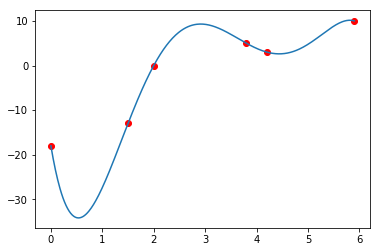

In [7]:
plt.scatter(X,Y,color='r')
plt.plot(x,y)